In [1]:
import numpy as np
import mne 
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import ICA
from mne_icalabel import label_components
from mne.datasets import eegbci

In [2]:
print(plt.style.available)
plt.style.use('seaborn')
# Set seaborn color palette for distinct colors
#sns.set_palette("husl",8)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
#Load Data
raw1 = mne.io.read_raw_edf("D:\VSCode\Tesis\Pengukuran\Raw\Base\C1/006.edf", preload=True)
raw2 = mne.io.read_raw_edf("D:\VSCode\Tesis\Pengukuran\Raw\Base\B2/002.edf", preload=True)
raw3 = mne.io.read_raw_edf("D:\VSCode\Tesis\Pengukuran\Raw\Raw_edf/003.edf", preload=True) #A1

print(raw1.ch_names,raw2.ch_names,raw3.ch_names)

tmin, tmax = 0, 971

sfreq1 = raw1.info['sfreq']
sfreq2 = raw2.info['sfreq']
sfreq3 = raw3.info['sfreq']
print(sfreq1,sfreq2,sfreq3)

Extracting EDF parameters from D:\VSCode\Tesis\Pengukuran\Raw\Base\C1\006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130559  =      0.000 ...  1019.992 secs...
Extracting EDF parameters from D:\VSCode\Tesis\Pengukuran\Raw\Base\B2\002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125951  =      0.000 ...   983.992 secs...
Extracting EDF parameters from D:\VSCode\Tesis\Pengukuran\Raw\Raw_edf\003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 124415  =      0.000 ...   971.992 secs...
['COUNTER', 'INTERPOLATED', 'AF3', 'T7', 'Pz', 'T8', 'AF4', 'RAW_CQ', 'GYROX', 'GYROY', 'MARKER', 'MARKER_HARDWARE', 'SYNC', 'TIME_STAMP_s', 'TIME_STAMP_ms', 'CQ_AF3', 'CQ_T7', 'CQ_Pz', 'CQ_T8', 'CQ_AF4'] ['COUNTER', 'INTERPOLATED', 'AF3', 'T7', 'Pz', 'T8', 'AF4', 'RAW_CQ', 'GYROX', 'GYROY', 'MARKER', 'MARKER_HARDWARE', 'SYNC', 'TIME_S

In [4]:
data1 = raw1.get_data()
data2 = raw2.get_data()
data3 = raw3.get_data()
print(data1,data2,data3)
np.shape(data1)
np.shape(data2)
np.shape(data3)

[[9.70000000e-05 9.80000000e-05 9.90000000e-05 ... 1.26000000e-04
  1.27000000e-04 1.28000000e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.22102564e-03 4.21384615e-03 4.21230769e-03 ... 4.43179487e-03
  4.39589744e-03 4.29692308e-03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.00000000e-06
  3.00000000e-06 3.00000000e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.00000000e-06
  3.00000000e-06 3.00000000e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.00000000e-06
  3.00000000e-06 3.00000000e-06]] [[1.15000000e-04 1.16000000e-04 1.17000000e-04 ... 7.50000000e-05
  7.60000000e-05 7.70000000e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.41333333e-03 4.42666667e-03 4.43435897e-03 ... 3.29641026e-03
  3.29589744e-03 3.31384615e-03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.00000000e-06
  3.00000000e-06 3.00000000e-06]

(20, 124416)

In [5]:
raw1_filter = raw1.copy()
raw1_filter.filter(l_freq=0.5, h_freq=45)
filtered_data1 = raw1_filter.get_data()

raw2_filter = raw2.copy()
raw2_filter.filter(l_freq=0.5, h_freq=45)
filtered_data2 = raw2_filter.get_data()

raw3_filter = raw3.copy()
raw3_filter.filter(l_freq=0.5, h_freq=45)
filtered_data3 = raw3_filter.get_data()

print(filtered_data1, filtered_data2, filtered_data3)
np.shape(filtered_data1)
np.shape(filtered_data2)
np.shape(filtered_data3)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband e

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (6.602 sec)

[[ 2.11758237e-20  1.26414416e-06  2.52826746e-06 ... -9.88748240e-07
  -4.94355270e-07  3.38813179e-21]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.14410869e-19 -7.54572999e-06 -8.99890906e-06 ...  1.34938439e-04
   9.96581943e-05  3.72694497e-19]
 ...
 [-1.41034294e-22 -2.23272968e-08 -4.46530300e-08 ...  2.40709558e-22
   4.88036561e-23  9.05762771e-23]
 [-2.02659

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


(20, 124416)

Fitting ICA to data using 20 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 20 PCA components


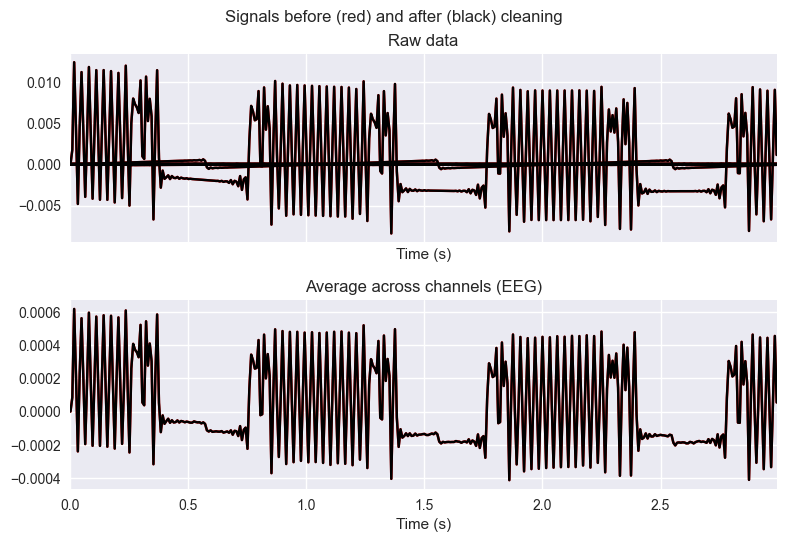

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 20 PCA components


In [6]:
    sampling_frequency = 128
    ica = mne.preprocessing.ICA(n_components=5, random_state=0)
    ica.fit(raw1_filter)
    ica.plot_overlay(raw1_filter)
    #artifact [0,4] (heartbeat, heartbeat)

    reconst_raw1 = raw1_filter.copy()
    ica.apply(reconst_raw1, exclude=[0])
    
    reconst_raw_data1 = reconst_raw1.get_data()

Fitting ICA to data using 20 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 20 PCA components


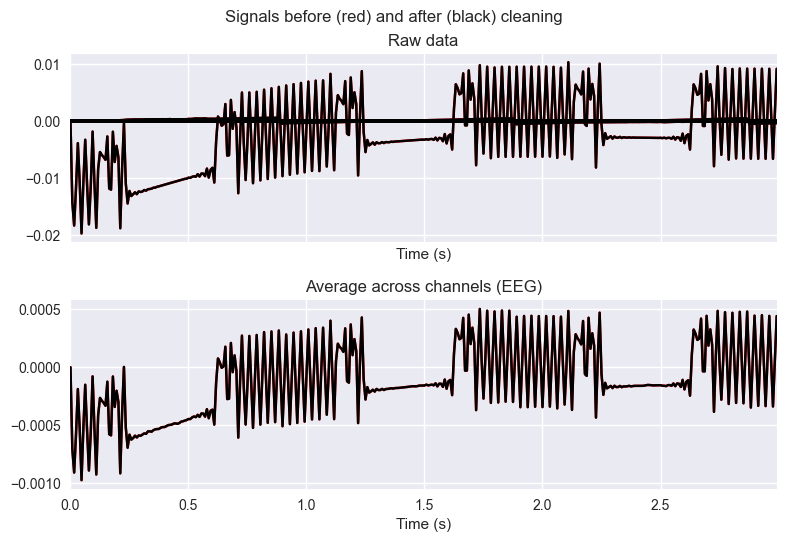

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 2 ICA components
    Projecting back using 20 PCA components


In [7]:
    sampling_frequency = 128
    ica = mne.preprocessing.ICA(n_components=5, random_state=0)
    ica.fit(raw2_filter)
    ica.plot_overlay(raw2_filter)
    #artifact [0,4] (heartbeat, eyeblink)

    reconst_raw2 = raw2_filter.copy()
    ica.apply(reconst_raw2, exclude=[0,4])
    
    reconst_raw_data2 = reconst_raw2.get_data()

Fitting ICA to data using 20 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 20 PCA components


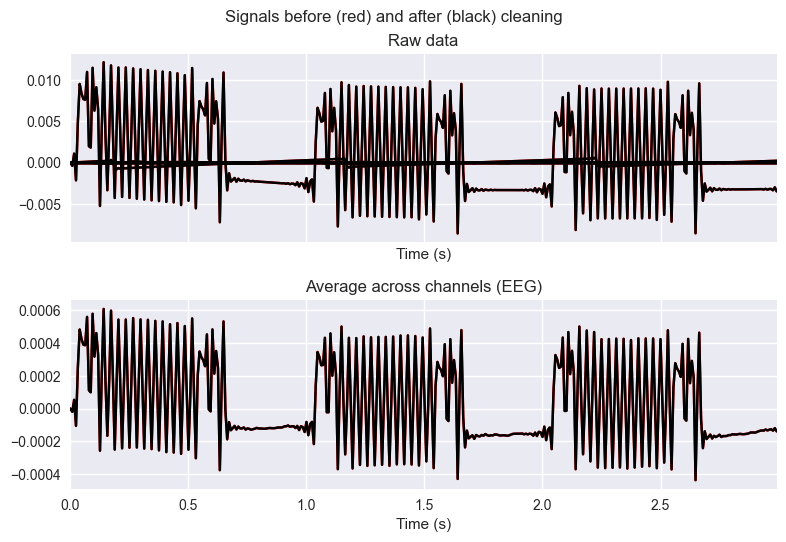

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 2 ICA components
    Projecting back using 20 PCA components


In [8]:
    sampling_frequency = 128
    ica = mne.preprocessing.ICA(n_components=5, random_state=0)
    ica.fit(raw3_filter)
    ica.plot_overlay(raw3_filter)
    #artifact [0,2] (heartbeat and eyeblink)

    reconst_raw3 = raw3_filter.copy()
    ica.apply(reconst_raw3, exclude=[1,4])
    
    reconst_raw_data3 = reconst_raw3.get_data()

In [ ]:
#raw1.plot()
#raw2.plot()
#raw3.plot()

In [ ]:

# Define the time values starting at 20 seconds
start_time0 = 508
num_samples0 = len(filtered_data1[4, 65024:65690])
time_values = np.linspace(start_time0, start_time0 + num_samples0 / sampling_frequency, num_samples0)

plt.figure(figsize=(10, 5))
plt.suptitle("Perbandingan Sinyal Mentah Praktisi Tafakur di kanal AF4")

plt.subplot(3,1,1)
#plt.title("Sinyal Mentah Subjek C1")
plt.plot(time_values, data1[4, 65024:65690]*1000000, label='Praktisi C1') 
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')

plt.subplot(3,1,2)
#plt.title("Sinyal Mentah Subjek B2")
plt.plot(time_values, data2[4, 65024:65690]*1000000, label='Praktisi B2', color = "#D2B48C")
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')

plt.subplot(3,1,3)
#plt.title("Sinyal Mentah Subjek A4")
plt.plot(time_values, data3[4, 65024:65690]*1000000, label='Praktisi A4', color = "#008B8B")
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')

#plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Define the time values starting at 20 seconds
start_time0 = 508
num_samples0 = len(filtered_data1[4, 65024:65690])
time_values = np.linspace(start_time0, start_time0 + num_samples0 / sampling_frequency, num_samples0)

plt.figure(figsize=(10, 5))
plt.suptitle("Perbandingan Sinyal Praktisi Tafakur yang telah Melalui Centering dan Penyaringan di Kanal AF4")

plt.subplot(3,1,1)
#plt.title("Sinyal Mentah Subjek C1")
plt.plot(time_values, filtered_data1[4, 65024:65690]*1000000, label='Praktisi C1') 
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')

plt.subplot(3,1,2)
#plt.title("Sinyal Mentah Subjek B2")
plt.plot(time_values, filtered_data2[4, 65024:65690]*1000000, label='Praktisi B2', color = "#D2B48C")
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')

plt.subplot(3,1,3)
#plt.title("Sinyal Mentah Subjek A4")
plt.plot(time_values, filtered_data3[4, 65024:65690]*1000000, label='Praktisi A1', color = "#008B8B")
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')

#plt.tight_layout
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')
#plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Define the time values starting at 20 seconds
start_time0 = 508
num_samples0 = len(filtered_data1[4, 65024:65690])
time_values = np.linspace(start_time0, start_time0 + num_samples0 / sampling_frequency, num_samples0)

plt.figure(figsize=(10, 5))
plt.suptitle("Perbandingan Sinyal Praktisi Tafakur yang telah Melalui Algoritma ICA di Kanal AF4")

plt.subplot(3,1,1)
#plt.title("Sinyal Mentah Subjek C1")
plt.plot(time_values, reconst_raw_data1[4, 65024:65690]*1000000, label='Praktisi C1') 
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')

plt.subplot(3,1,2)
#plt.title("Sinyal Mentah Subjek B2")
plt.plot(time_values, reconst_raw_data2[4, 65024:65690]*1000000, label='Praktisi B2', color = "#D2B48C")
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')

plt.subplot(3,1,3)
#plt.title("Sinyal Mentah Subjek A4")
plt.plot(time_values, reconst_raw_data3[4, 65024:65690]*1000000, label='Praktisi A1', color = "#008B8B")
plt.legend(loc='upper right')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')


#plt.tight_layout

#plt.legend()
plt.grid(True)
plt.show()

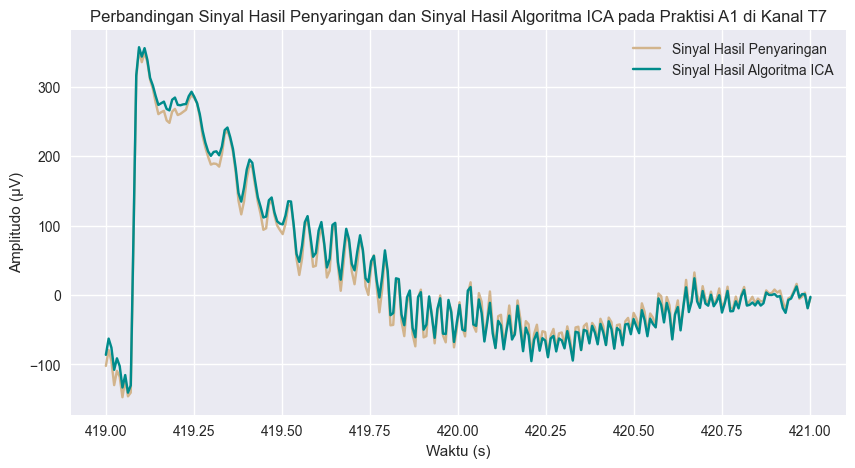

In [11]:
# Define the time values starting at 20 seconds
start_time = 419
num_samples = len(filtered_data1[1, 53632:53888])
time_values2 = np.linspace(start_time, start_time + num_samples / sampling_frequency, num_samples)


# Plot EEG data using Matplotlib
plt.figure(figsize=(10, 5))
#plt.plot(data[1, 0:12800], label='Sinyal Mentah')  # Change channel index as needed
plt.plot(time_values2, filtered_data3[5, 53632:53888]*1000000, label='Sinyal Hasil Penyaringan', color = "#D2B48C")
plt.plot(time_values2, reconst_raw_data3[5, 53632:53888]*1000000, label='Sinyal Hasil Algoritma ICA', color = "#008B8B")
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')
plt.title('Perbandingan Sinyal Hasil Penyaringan dan Sinyal Hasil Algoritma ICA pada Praktisi A1 di Kanal T7')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the time values starting at 20 seconds
start_time = 419
num_samples = len(filtered_data2[1, 53632:53888])
time_values2 = np.linspace(start_time, start_time + num_samples / sampling_frequency, num_samples)


# Plot EEG data using Matplotlib
plt.figure(figsize=(10, 5))
#plt.plot(data[1, 0:12800], label='Sinyal Mentah')  # Change channel index as needed
plt.plot(time_values2, filtered_data2[1, 53632:53888]*1000000, label='Sinyal A', color = "#D2B48C")
plt.plot(time_values2, reconst_raw_data2[1, 53632:53888]*1000000, label='Sinyal B', color = "#008B8B")
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')
plt.title('Perbandingan Sinyal A dan Sinyal B pada Praktisi A1')
plt.legend()
plt.grid(True)
plt.show()

from scipy.signal import savgol_filter

# Define the window length and polynomial order for the filter
window_length = 51  # Adjust this as needed
poly_order = 3  # Adjust this as needed

raw_savgol = raw_filter.copy()
# Apply the Savitzky-Golay filter to EEG data
raw_savgol._data = savgol_filter(raw_savgol._data, window_length, poly_order, axis=1)

# Now, 'raw' contains the EEG data with the Savitzky-Golay filter applied

raw_savgol_data = raw_savgol.get_data()

# Define the time values starting at 20 seconds
start_time = 20
num_samples = len(filtered_data[1, 64640:65690])
time_values2 = np.linspace(start_time, start_time + num_samples / sampling_frequency, num_samples)


# Plot EEG data using Matplotlib
plt.figure(figsize=(10, 5))
#plt.plot(data[1, 0:12800], label='Sinyal Mentah')  # Change channel index as needed
plt.plot(time_values2, raw_savgol_data[1, 64640:65690], label='Sinyal Hasil SAVGOL', color = "#D2B48C")
plt.plot(time_values2, filtered_data[1, 64640:65690], label='Sinyal Hasil Algoritma ICA', color = "#008B8B")
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')
plt.title('Perbandingan Sinyal EEG Hasil Penyaringan dan Sinyal EEG Hasil Algoritma ICA')
plt.legend()
plt.grid(True)
plt.show()

import pywt

raw_pywt = raw_filter.copy()

raw_pywt_data = raw_pywt.get_data()
# Define the wavelet denoising parameters
wavelet_name = 'db4'  # You can choose a different wavelet
level = 5  # Adjust the level of denoising as needed

# Perform wavelet denoising on each EEG channel
denoised_data = np.zeros_like(raw_pywt_data)
for i in range(raw_pywt_data.shape[0]):
    data = raw_pywt_data[i, :]
    coeffs = pywt.wavedec(data, wavelet_name, level=level)
    threshold = np.median(np.abs(coeffs[-1])) / 0.6745  # Adjust the threshold as needed
    new_coeffs = [c if i == level else pywt.threshold(c, threshold, mode="soft") for i, c in enumerate(coeffs)]
    denoised_data[i, :] = pywt.waverec(new_coeffs, wavelet_name)

# Replace the EEG data with the denoised data in the raw object
raw_pywt._data = denoised_data

# Now, 'raw' contains the EEG data with wavelet denoising applied

raw_pywt_data = raw_pywt.get_data()
# Define the time values starting at 20 seconds
start_time = 20
num_samples = len(filtered_data[1, 2560:5120])
time_values2 = np.linspace(start_time, start_time + num_samples / sampling_frequency, num_samples)


# Plot EEG data using Matplotlib
plt.figure(figsize=(10, 5))
#plt.plot(data[1, 0:12800], label='Sinyal Mentah')  # Change channel index as needed
plt.plot(time_values2, raw_pywt_data[1, 2560:5120], label='Sinyal Hasil Algoritma Pywavelets', color = "#D2B48C")
plt.plot(time_values2, reconst_raw_data[1, 2560:5120], label='Sinyal Hasil Algoritma ICA', color = "#008B8B")
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo (μV)')
plt.title('Perbandingan Sinyal EEG Hasil Penyaringan dan Sinyal EEG Hasil Algoritma ICA')
plt.legend()
plt.grid(True)
plt.show()